In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,auc
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("churn.csv")

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

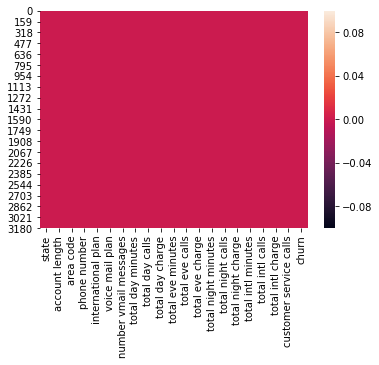

In [7]:
sns.heatmap(df.isnull())

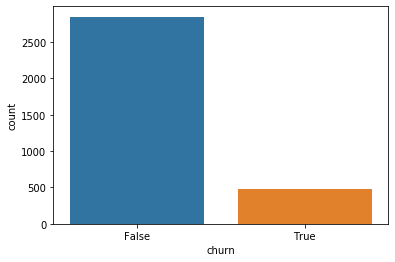

In [8]:
sns.countplot(df['churn'])

<function matplotlib.pyplot.show(*args, **kw)>

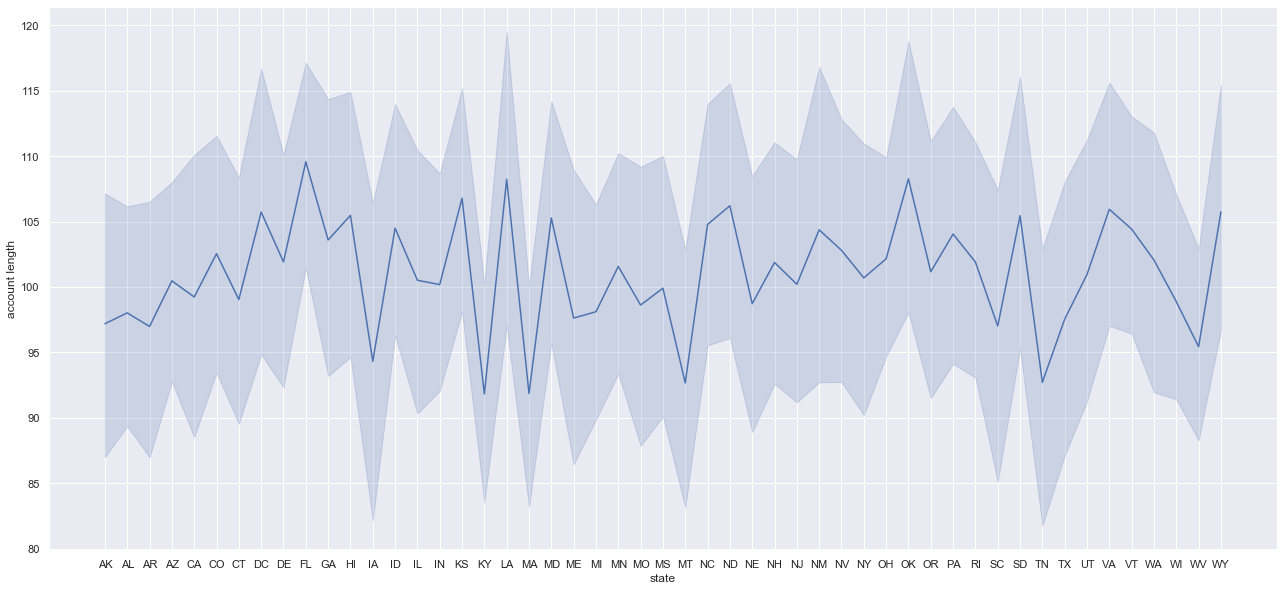

In [9]:
sns.set(rc={"figure.figsize":(22,10)})
sns.lineplot(x="state",y="account length",data=df)
plt.show

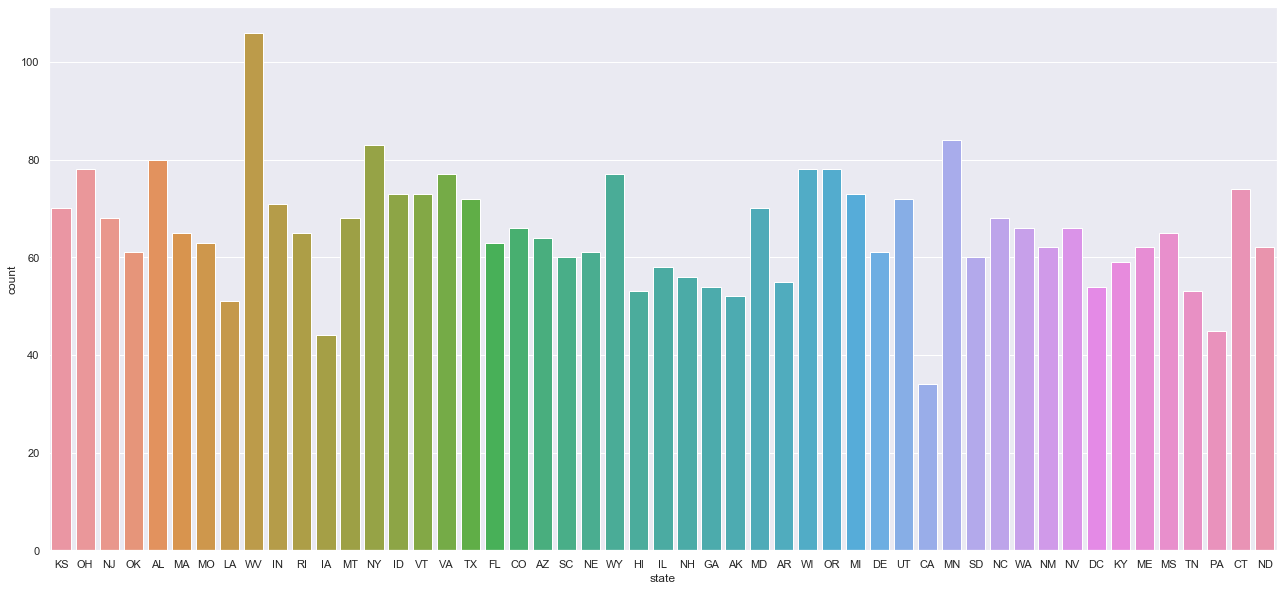

In [10]:
sns.countplot(df['state'])

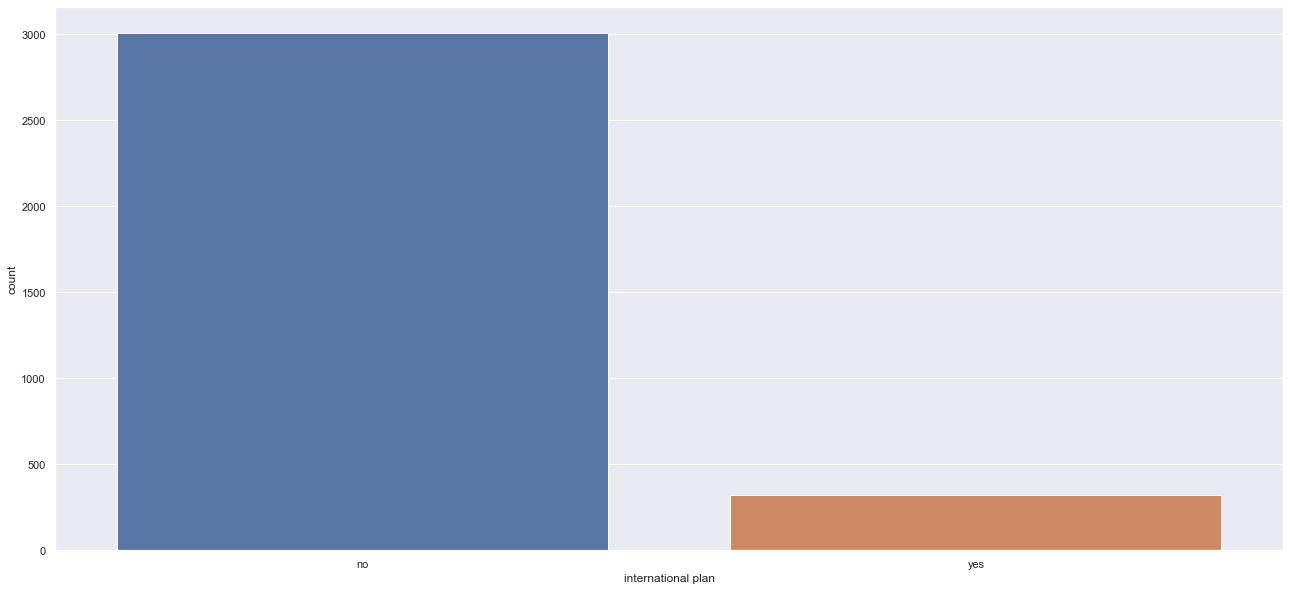

In [11]:
sns.countplot(df['international plan'])

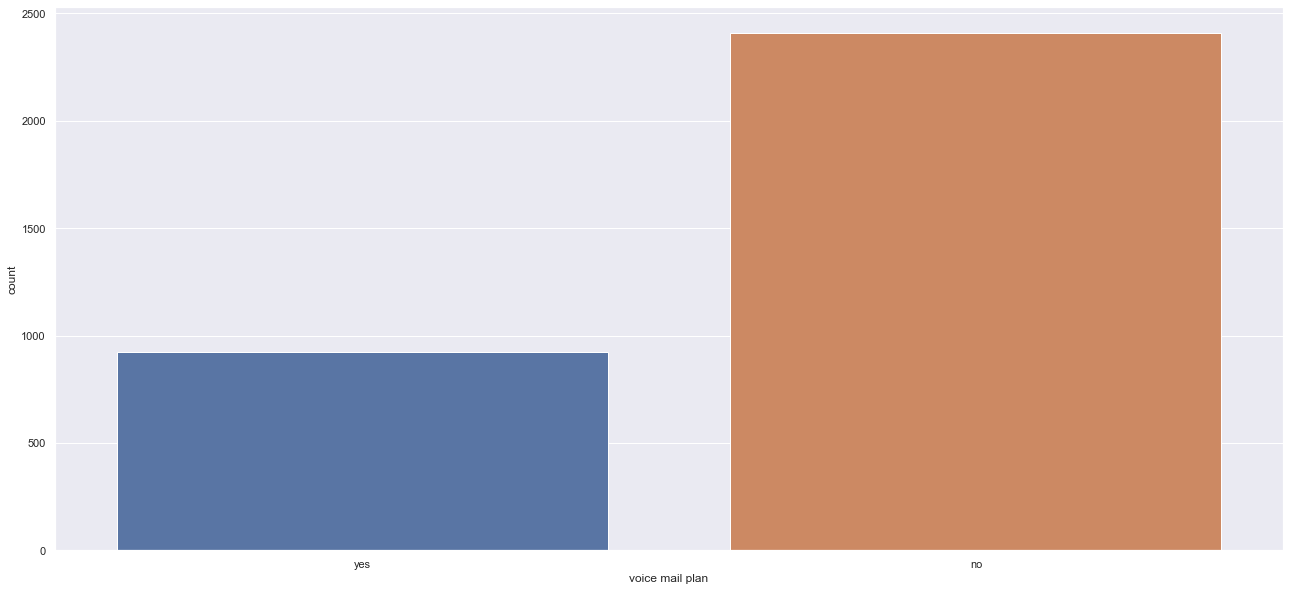

In [12]:
sns.countplot(df['voice mail plan'])

In [13]:
cat=["state","international plan","voice mail plan","churn"]
for i in cat:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].astype("str"))

In [14]:
df.corr()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


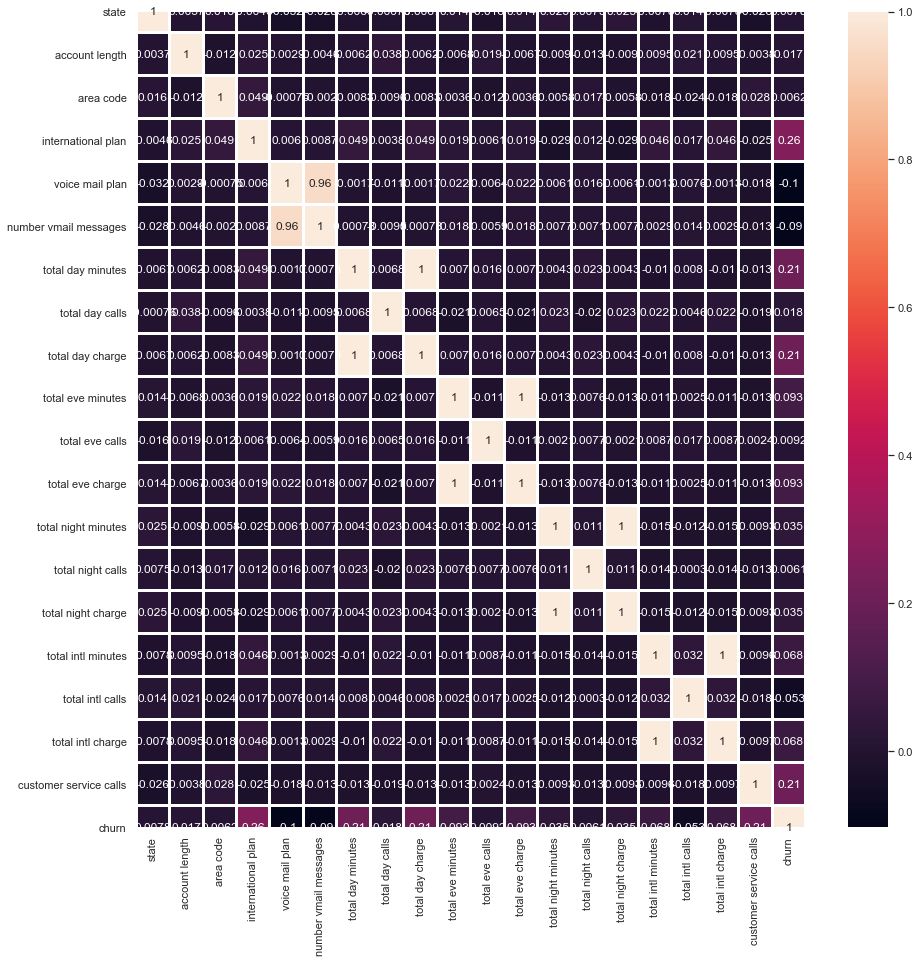

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, linewidths=2)

Some feature are strongly correlated with each other such as total day minutes with total day charge,
total eve minutes with total eve charge,
total intl minutes with total intl charge,voice mail plan with number vmail messages,
total night minutes with total night charge.

In [16]:
df.drop(['total day minutes'],inplace=True,axis=1)
df.drop(['total eve minutes'],inplace=True,axis=1)
df.drop(['total intl minutes'],inplace=True,axis=1)
df.drop(['voice mail plan'],inplace=True,axis=1)
df.drop(['total night minutes'],inplace=True,axis=1)
df.drop(['phone number'],inplace=True,axis=1)

In [17]:
df.head()

,state,account length,area code,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


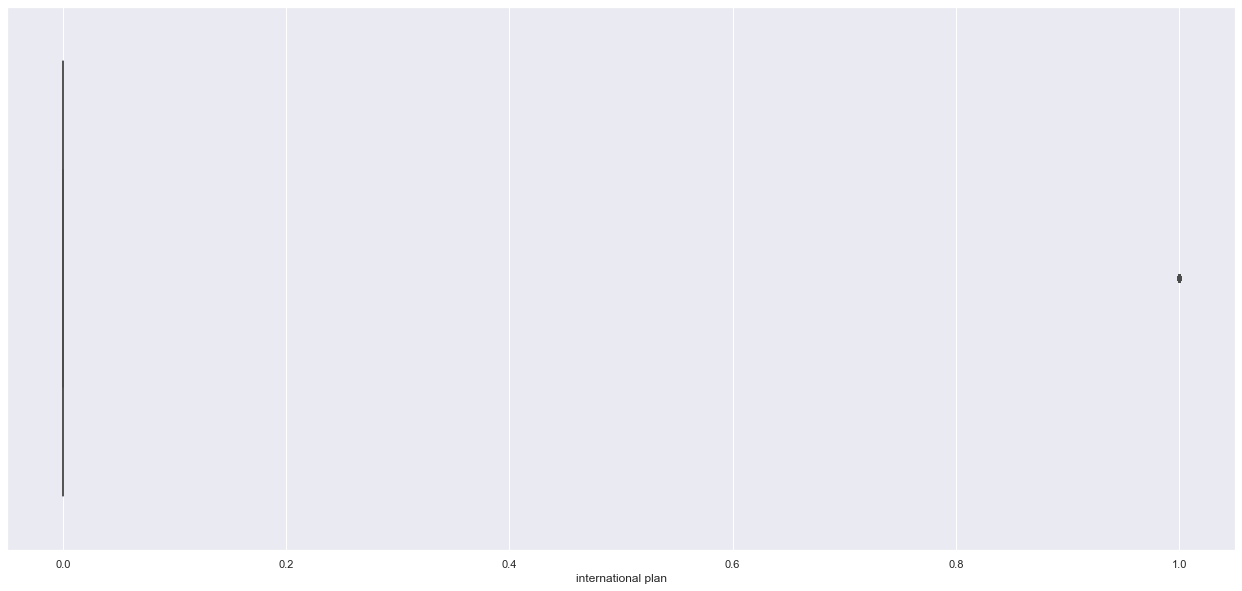

In [18]:
sns.boxplot(df['international plan'])

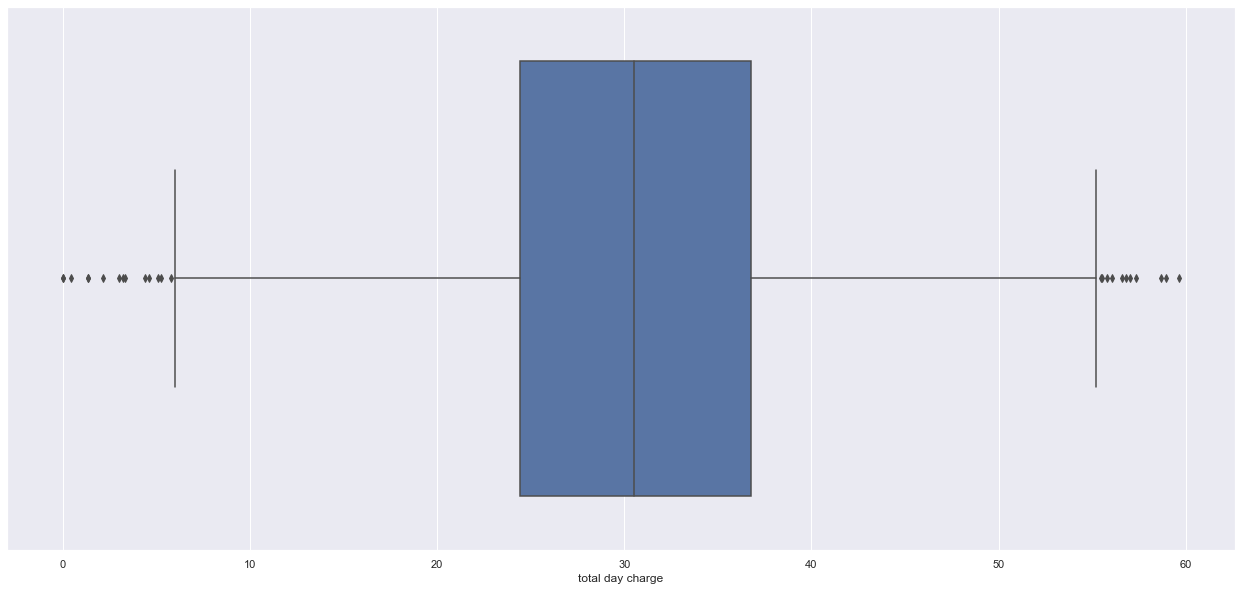

In [19]:
sns.boxplot(df['total day charge'])

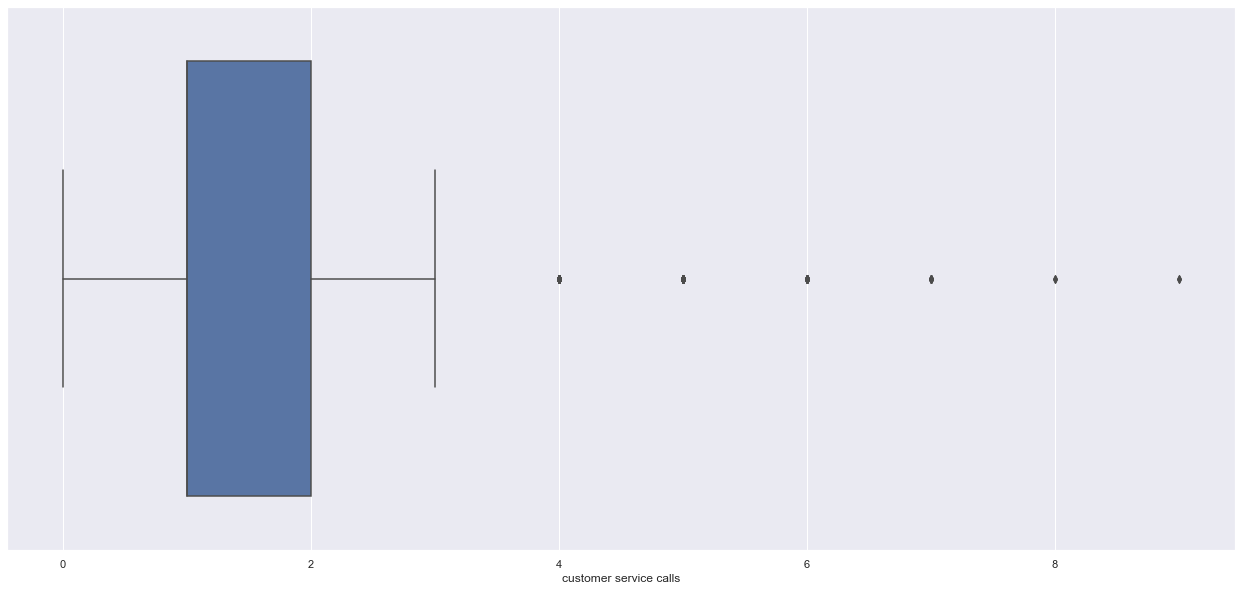

In [20]:
sns.boxplot(df['customer service calls'])

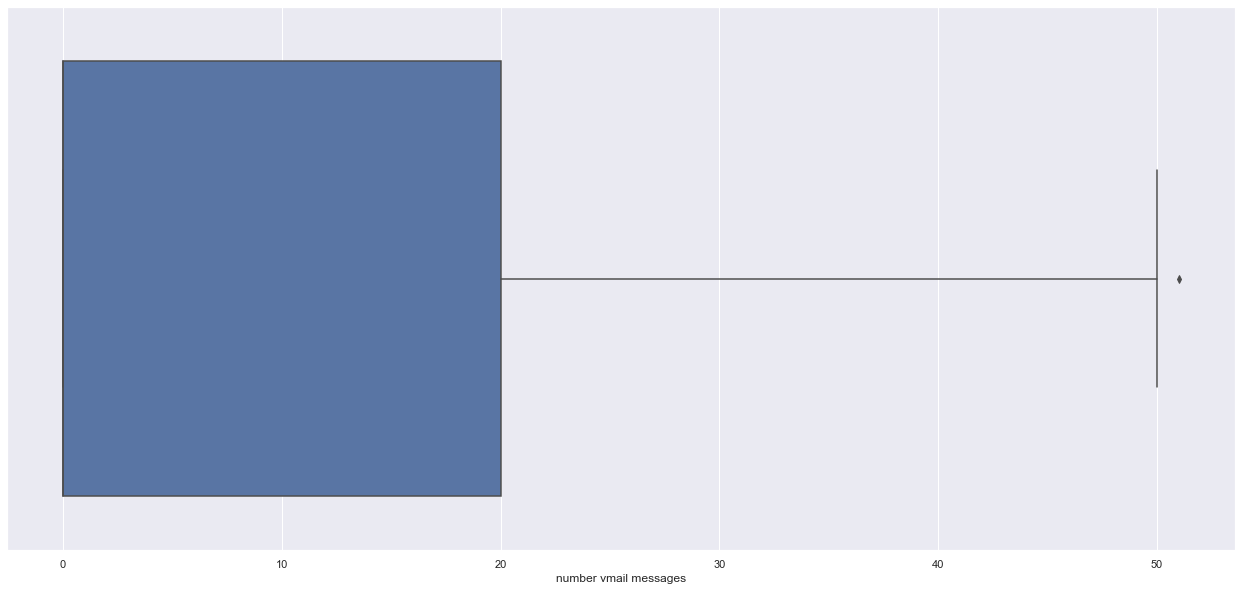

In [21]:
sns.boxplot(df['number vmail messages'])

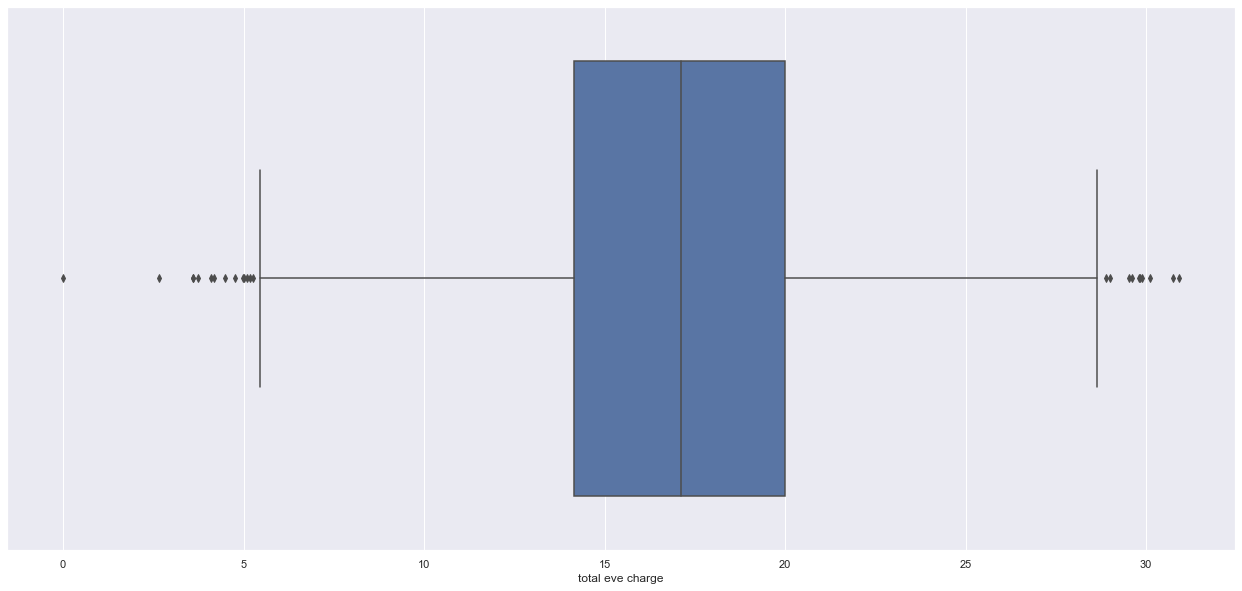

In [22]:
sns.boxplot(df['total eve charge'])

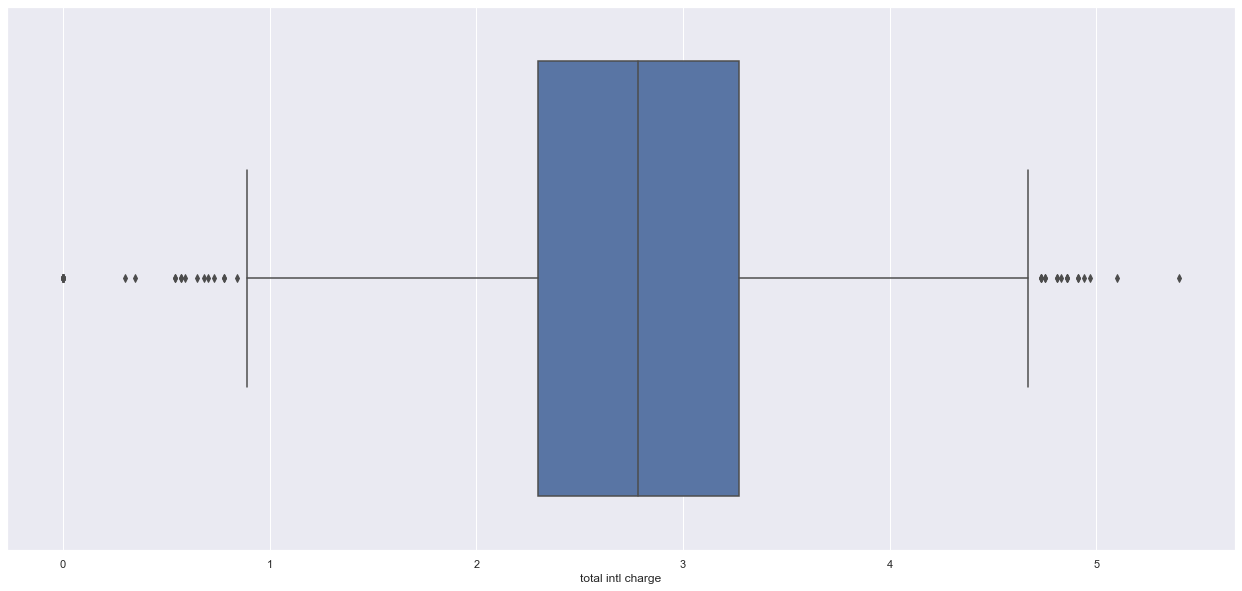

In [23]:
sns.boxplot(df['total intl charge'])

In [24]:
X= df.drop(['churn'], axis = 1)
print(X.shape)

y =df['churn'] 
print(y.shape)

(3333, 14)
(3333,)


In [25]:
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(3333, 15)
(2860, 15)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [30]:
lr= LogisticRegression()
tree = DecisionTreeClassifier()
knn =  KNeighborsClassifier()
svc = SVC()
forest = RandomForestClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()

In [31]:
models = {lr:'LogisticRegression',
          tree:'DecisionTree',
          knn: 'KNN',
          svc: 'SVC',
          forest: 'RandomForest',
          ada: 'Adaboost',
          gnb: 'Naive'}

In [32]:
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

def acc_res(y_test,y_pred):
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)

    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
        
    return accuracy_scores
    
accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 86.4545%
Confusion Matrix
[[912  23]
 [126  39]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       935
           1       0.63      0.24      0.34       165

    accuracy                           0.86      1100
   macro avg       0.75      0.61      0.63      1100
weighted avg       0.84      0.86      0.84      1100

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 90.4545%
Confusion Matrix
[[877  58]
 [ 47 118]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       935
           1       0.67      0.72      0.69       165

    accuracy                           0.90      1100
   macro avg       

Random Forest with GridSearchCV

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

gridrfg=GridSearchCV(estimator=rfg, param_grid=parameters, scoring='accuracy',cv=10)
gridrfg.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=23, n_jobs=None,
                                              oob_score=False, random_state=33,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'cr

In [34]:
gridrfg.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2}

In [37]:
predict_rfg = gridrfg.predict(X_test)
print("Accuracy score  :",accuracy_score(y_test,predict_rfg))
print("Classification Report  :",classification_report(y_test,predict_rfg))
print ("Confusion matrix  :",confusion_matrix(y_test,predict_rfg))

Accuracy score  : 0.9390909090909091
Classification Report  :               precision    recall  f1-score   support

           0       0.94      0.99      0.97       935
           1       0.95      0.63      0.76       165

    accuracy                           0.94      1100
   macro avg       0.94      0.81      0.86      1100
weighted avg       0.94      0.94      0.93      1100

Confusion matrix  : [[929   6]
 [ 61 104]]


In [38]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator =rfg, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of RandomForestClassifier  = ", cross_validation)
print("\nCross validation mean accuracy of  RandomForestClassifier = ", cross_validation.mean())

Cross validation accuracy of RandomForestClassifier  =  [0.9375     0.92410714 0.91964286 0.91517857 0.95535714 0.91928251
 0.93721973 0.94170404 0.94144144 0.93693694]

Cross validation mean accuracy of  RandomForestClassifier =  0.9328370370690997


I will choose Random Forest with GridSearchCV as my final model because it perform well in this dataset.

Accuracy_score=.9390

Cross_val_score= .9328

In [39]:
from sklearn.externals import joblib

joblib.dump(predict_rfg,'df_joblib')

['df_joblib']